# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

*Tidy Data* is a paper about how to clean data into a consistent and structured format that is useful for data manipulation and analysis and can easily be visualized.
  
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

The "tidy data standard" is intended to facilitate exploratory data analysis and to make data analysis tools work well with one another by offering a standard structure for data sets.
  
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

The sentence, "Like families, tidy datasets are all alike but every messy dataset is messy in its own way," means that tidy datasets all follow a single standard format for how the data is organized, whereas, messy data have no single way they are unorganized. Messy data can be messy for numerous different reasons. The sentence, "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general," means that once in the structured format, one can discern what is a variable vs observation. But, before the data is in a table, it can be subjective as to what should be considered the variable based on the given information and depending on the the purpose of the dataset. Wickham gives good advice when saying it is better to have relationships shown through variables and to make comparisons between observations.
  
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  
Values are what we consider the data. Values are either numbers or strings, and are organized to create a dataset. Variables, or columns, are underlying attributes. Observations, or rows, contain the values for the all of the underlying attributes for a given unit.
  
  5. How is "Tidy Data" defined in section 2.3?

"Tidy Data" is defined as "a standard way of mapping the meaning of dataset to its structure." Tidy data must be formatted so variables are columns, observations are rows, and tables are comprised of a single type of observational unit.
  
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems?

The 5 most common problems with messy data are:
      1. "Common headers are values, not variable names."
      2. "Multiple variables are stored in one column."
      3. "Variables are stored in both rows and columns."
      4. "Multiple types of observational units are stored in the same table."
      5. "A single observational unit is stored in multiple tables."
  
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 is messy because the missing value places are not structured and the tmax and tmin variables are stored in rows instead of columns and the days are stored as columns instead of rows. Table 12 is "molten" because he turned the day columns into rows by creating a date variable. This allowed the data to be stacked and the missing values are made implicit.
  
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

The "chicken-and-egg" problem with tidy data is that the tidy data is only useful so long as the analysis tools can process the tidy data. This means the tools and the data are tied together such that both would have to advance at the same time, as if only one changed, it would render the other unusable. Wickham hopes people will build off the tidy framework and create even better methods of storing data and data tools.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

I got rid of the commas and then changed the data type to numeric. I ended up with 0 missing values.

In [1]:
import numpy as np # Imports numpy package into workspace
import pandas as pd  # Imports pandas package into workspace

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

Index(['Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object') 

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '1

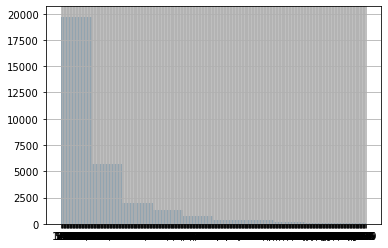

In [2]:
# Initial EDA
df = pd.read_csv('./data/airbnb_hw.csv',low_memory=False) # loads AirBnb csv data into dataframe
print(df.shape, '\n') # Lists the dimensions of df, 30478 rows
print(df.dtypes, '\n') # The types of the variables, Price is an object
print(df.columns[1:13], '\n') # Column names, Price looks ok
var = 'Price'
df[var].describe() # values in all rows
print(df[var].unique(),'\n') # looks like there are no nans, but there are some numbers with commas
print(df[var].hist(), '\n') # Plot is not very helpful

In [3]:
# Clean
df[var] = df[var].str.replace(',','') # Get rid of commas in Price values
print(df[var].unique(),'\n') # Check, it worked!
df[var] = pd.to_numeric(df[var], errors='coerce') # Coerce the Price variable from object to numeric
print(df[var].dtypes) # Check, it worked!

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' '47

AxesSubplot(0.125,0.125;0.775x0.755) 



count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

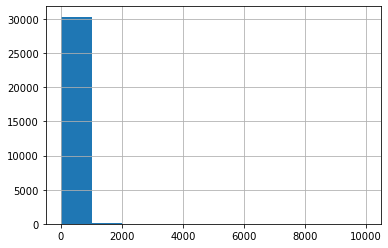

In [4]:
print(df[var].hist(), '\n') # New plot looks better
df[var].describe() # Count matches the inital count

2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.

In [5]:
# Initial EDA
sdf = pd.read_csv('./data/sharks.csv',low_memory=False) # loads sharks csv data into dataframe
print(sdf.shape, '\n') # Lists the dimensions of sdf, 6462 rows
print(sdf.dtypes, '\n') # The types of the variables, Type is an object
var = 'Type'
print(sdf[var].unique(), '\n') # Shows categories of "Type," there is a nan
print(sdf[var].value_counts(), '\n') # shows each value type and the frequency, 5 missing values

(6462, 257) 

index             int64
Case Number      object
Date             object
Year            float64
Type             object
                 ...   
Unnamed: 251    float64
Unnamed: 252    float64
Unnamed: 253    float64
Unnamed: 254    float64
Unnamed: 255    float64
Length: 257, dtype: object 

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Boatomg                   1
Under investigation       1
Unverified                1
Name: Type, dtype: int64 



In [6]:
sdf[var] = sdf[var].replace(['Unconfirmed','Unverified','Invalid'],np.nan) # Missing info, converting to nan
sdf[var] = sdf[var].replace(['Boat','Boatomg'],'Boating') #excluded watercraft b/ it could be things like jet-skiing, etc.

print(sdf[var].value_counts(), '\n')

Unprovoked             4716
Provoked                593
Sea Disaster            239
Boating                 202
Watercraft              142
Questionable             10
Under investigation       1
Name: Type, dtype: int64 



3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

(22986, 709) 

count    22986.000000
mean         0.845428
std          0.477276
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: released, dtype: float64 

[9 0 1] 

1    19154
0     3801
9       31
Name: released, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755) 



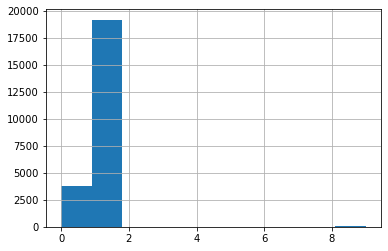

In [7]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file

df = df.rename(columns = {'WhetherDefendantWasReleasedPretrial':'released'}) # Shorten variable
var = 'released' # assign 'released' to var
print(df.shape, '\n') # 22986 observations
print(df[var].describe(), '\n') # correct number of observations
print(df[var].unique(),'\n') # 0 (not released), 1 (released), and 9 (uncertain), CATEGORICAL DATA, 9 is missing data and there are 31 values
print(df[var].value_counts(), '\n') # type is numeric
print(df[var].hist(), '\n') # About 83% of observations are released

[nan  0.  1.] 

1.0    19154
0.0     3801
Name: released, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755) 



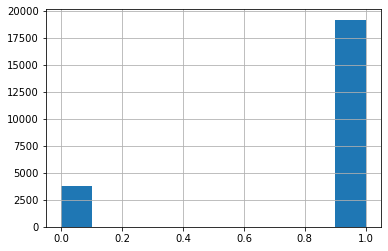

In [8]:
df[var] = df[var].replace(9, np.nan) # replaces 9s with nan

# After coercion:
print(df[var].unique(),'\n') # 0 (not released), 1 (released), and nan (uncertain), CATEGORICAL DATA, 9 is missing data and there are 31 values
print(df[var].value_counts(), '\n') # nans are not counted
print(df[var].hist(), '\n')

4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [9]:
# Question 4
df = df.rename(columns = {'ImposedSentenceAllChargeInContactEvent':'MosSentenced'}) # Shorten variable
var = 'MosSentenced'
df[var] = pd.to_numeric(df[var], errors='coerce')
df[var+'_NA'] = df[var].isnull()
print(pd.crosstab(df[var+'_NA'],df['SentenceTypeAllChargesAtConvictionInContactEvent']),'\n') # nulls are due to others or unknown sentence types
# sentence type: 0=prob/none, 1=12mos, 2=>12mos, 4=other, 9=unknown

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
MosSentenced_NA                                                             
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274 



In [10]:
# Other and Unknown sentence types are properly allocated as nan already, will create dummy for both types
df['OtherSentence'] = (df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4) # Other sentence type dummy variable
df['UnknownSentence'] = (df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9) # Unknown sentence type dummy variable
print(pd.crosstab(df[var],df['SentenceTypeAllChargesAtConvictionInContactEvent']),'\n')

SentenceTypeAllChargesAtConvictionInContactEvent     0   1  2
MosSentenced                                                 
0.000000                                          4953   0  0
0.032854                                             0   6  0
0.065708                                             3  21  0
0.098563                                             2   6  0
0.131417                                             4  10  0
...                                                ...  .. ..
1200.000000                                          0   0  1
1500.000000                                          0   0  1
1752.000000                                          0   0  1
1980.000000                                          0   0  1
2208.000000                                          0   0  1

[483 rows x 3 columns] 



**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.

In [11]:
cdf = pd.read_csv('./data/college_completion.csv',low_memory=False) # Load the data

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [12]:
print('Dimensions of the data: ', cdf.shape, '\n')
print('Number of observations: ', cdf.shape[0], '\n')
print('Varibles: ', cdf.columns.tolist())
cdf.head()

Dimensions of the data:  (3798, 63) 

Number of observations:  3798 

Varibles:  ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_t

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


3. Cross tabulate `control` and `level`. Describe the patterns you see.

In [13]:
pd.crosstab(cdf['control'], cdf['level']) 
# private colleges tend to be 4-yr schools more than 2-yr
# public colleges tend to be 2-yrs more frequently than 4-yr schools

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.

In [14]:
import seaborn as sns # Import Seaborn

<AxesSubplot:xlabel='grad_100_value', ylabel='Count'>

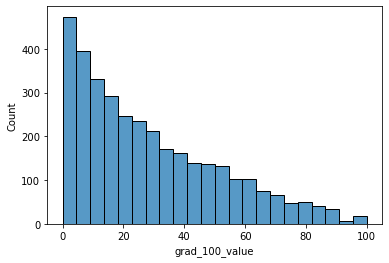

In [15]:
sns.histplot(cdf['grad_100_value']) # Histogram

<AxesSubplot:xlabel='grad_100_value', ylabel='Density'>

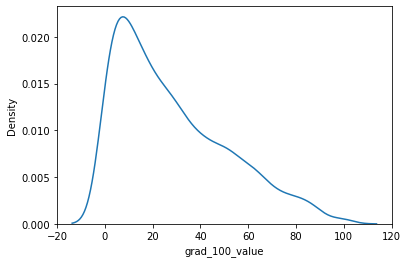

In [16]:
sns.kdeplot(cdf['grad_100_value']) # Kernel density plot

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grad_100_value'>

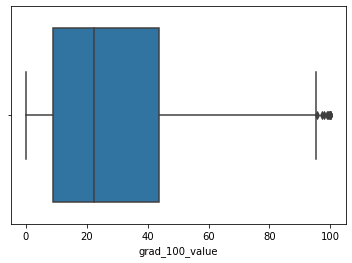

In [17]:
sns.boxplot(cdf['grad_100_value']) # Boxplot

In [18]:
print(cdf['grad_100_value'].describe(), '\n') # Statistical description

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64 



5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?

<AxesSubplot:xlabel='grad_100_value', ylabel='Density'>

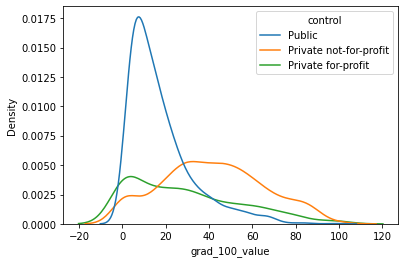

In [19]:
sns.kdeplot(data=cdf, x='grad_100_value', hue='control') # Grouped by control
# the public colleges have less variance in grad_100_value values.
# From this graph, private not-for-profit colleges seem to have the best graduation rates.

<AxesSubplot:xlabel='grad_100_value', ylabel='Density'>

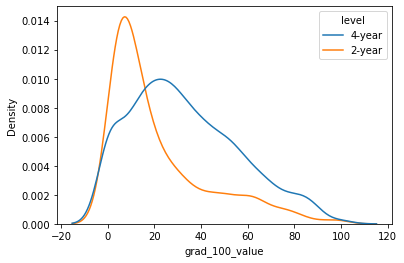

In [20]:
sns.kdeplot(data=cdf, x='grad_100_value', hue='level') # Grouped by level
# 4-yr colleges have better graduation rates than 2-yr schools.

In [21]:
# Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`.
cdf.loc[:,['level','grad_100_value']].groupby('level').describe()
# 4-yr colleges have better graduation rates

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

In [22]:
cdf.loc[:,['control','grad_100_value']].groupby('control').describe()
# private not-for-profit colleges have better graduation rates
# 4-yr private not-for-profit colleges would appear to have the best graduation rates.

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

<AxesSubplot:xlabel='grad_100_value', ylabel='Density'>

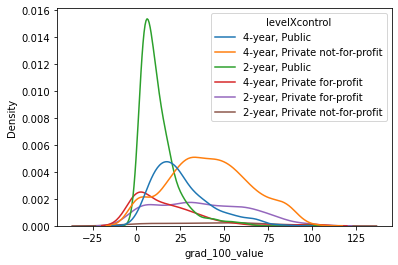

In [23]:
cdf['levelXcontrol'] = cdf['level']+', '+cdf['control']
sns.kdeplot(data=cdf, x='grad_100_value', hue='levelXcontrol')
# 4-year, Private not-for-profit colleges appear to have the best graduation rates.

7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.

<AxesSubplot:xlabel='aid_value', ylabel='Density'>

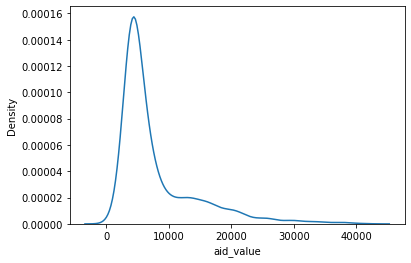

In [24]:
sns.kdeplot(data=cdf, x='aid_value')

<AxesSubplot:xlabel='aid_value', ylabel='Density'>

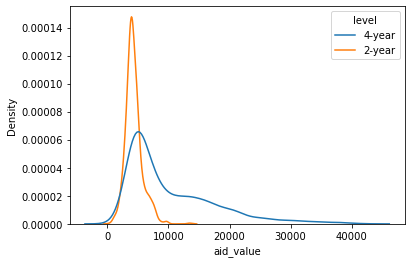

In [25]:
sns.kdeplot(data=cdf, x='aid_value', hue='level')
# Though this shows some information (2-year schools offering aid more frequently at a tighter range than 4-year schools and 4-year schools offering aid at a larger range)
# the bimodal nature is not as clearly explained.

<AxesSubplot:xlabel='aid_value', ylabel='Density'>

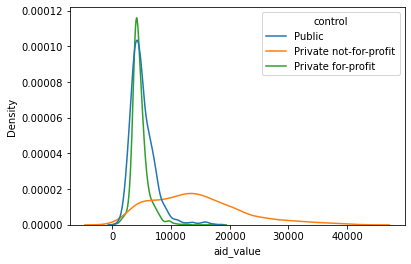

In [26]:
sns.kdeplot(data=cdf, x='aid_value', hue='control')
# the type of school explains the bimodal nature of the graph
# public and private for-profit schools have similar amounts of aid (fairly small range)
# private not-for-profit schools offer the most aid, though the aid has a large variance.

8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

<AxesSubplot:xlabel='grad_100_value', ylabel='aid_value'>

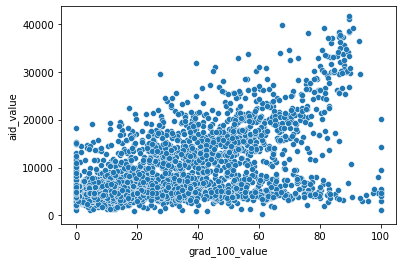

In [27]:
sns.scatterplot(data=cdf, x='grad_100_value', y='aid_value')
# the data is pretty dense so definitive trends are hard to see
# there seems to be some direct relationship between aid value and graduation rate
# It is interesting that the highest graduation rates have the least aid.
# and that good graduation rates (~80%) seem to represent people with a lot of aid or no aid, not medium amounts of aid.

<AxesSubplot:xlabel='grad_100_value', ylabel='aid_value'>

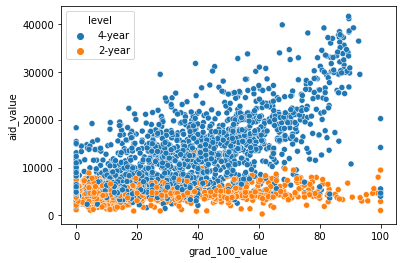

In [30]:
sns.scatterplot(data=cdf, x='grad_100_value', y='aid_value', hue='level')
# Aid seems to increase graduation rates at 4-yr colleges more than at 2-yr colleges

<AxesSubplot:xlabel='grad_100_value', ylabel='aid_value'>

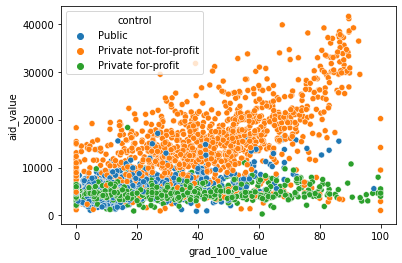

In [31]:
sns.scatterplot(data=cdf, x='grad_100_value', y='aid_value', hue='control')
# Aid seems to increase graduation rates at private not-for-profit colleges more than at other colleges.

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.